In [57]:
# Load libraries
library(ggplot2)
# install.packages("iNEXT")
library(iNEXT)
#install.packages("vegan")
library(vegan)
#install.packages("gplots")
library(gplots)

In [3]:
# Open the ASV table 
ASVtab <- read.csv("../Part2/output/ASVtable.sorted.myxonly.50.60.tsv", sep = "\t", header = T, dec = ",")
str(ASVtab)

'data.frame':	323 obs. of  21 variables:
 $ X.OTU.ID  : Factor w/ 323 levels "ASV1","ASV10",..: 1 111 221 258 269 280 291 302 313 2 ...
 $ X2S1      : int  0 0 16719 0 0 0 0 7600 0 0 ...
 $ X2S2      : int  51248 0 2094 0 0 0 0 992 0 0 ...
 $ X2S3      : int  12352 0 965 0 0 0 0 1289 15530 0 ...
 $ X2S4      : int  0 0 179 0 0 0 0 1853 123 0 ...
 $ X2S5      : int  1842 0 590 0 0 0 0 393 0 0 ...
 $ X5S1      : int  0 13754 0 7180 11719 16094 0 0 0 0 ...
 $ X5S2      : int  0 2271 0 2806 3305 2411 39421 0 0 9758 ...
 $ X5S3      : int  0 971 0 211 46 1981 0 0 0 0 ...
 $ X5S4      : int  0 1217 0 2280 917 3624 0 0 0 0 ...
 $ X5S5      : int  0 67 6 0 0 263 4259 0 0 0 ...
 $ NegExtr   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Best_match: Factor w/ 118 levels "Colloderma_oculatum_ref695_size1",..: 55 50 37 48 48 34 75 114 59 88 ...
 $ Similarity: Factor w/ 156 levels "100.0","65.5",..: 1 112 1 140 139 49 127 138 67 45 ...
 $ Kingdom   : Factor w/ 16 levels "","Colloderma",..: 7 7 7 7 7 7 11 15 7 1

In [6]:
# Prepare the data to calculate rarefied/extrapolated diversity estimates
# choose only numeric columns with abundance information.
ASVnum <- ASVtab[, unlist(lapply(ASVtab, is.numeric))]
row.names(ASVnum) <- ASVtab$OTU.ID
ASVnum_inc <- ASVnum > 0  # Create presence/absence table instead of abundance table
print(paste('Total number of samples: ', length(colnames(ASVnum_inc))), quote = F)
colnames(ASVnum_inc)


# get OTU incidence data for each plot
Plot_2 <- ASVnum_inc[,grepl("X2S", colnames(ASVnum_inc))]
Plot_5 <- ASVnum_inc[,grepl("X5S", colnames(ASVnum_inc))]

inc_byplot <- cbind(rowSums(Plot_2), rowSums(Plot_5)) # create a dataframe with incidence data summed by rows within plots

colnames(inc_byplot) <- c("Plot_2", "Plot_5")

inc_byplot <- rbind(c(length(colnames(Plot_2)),
                      length(colnames(Plot_5))), inc_byplot) # add the number of samples per plot in the first row

[1] Total number of samples:  11


[1] "X2S1"    "X2S2"    "X2S3"    "X2S4"    "X2S5"    "X5S1"    "X5S2"   
 [8] "X5S3"    "X5S4"    "X5S5"    "NegExtr"

In [11]:
# Calculate diversity estimates using iNEXT
out <- iNEXT(inc_byplot, q=0, 
             datatype ="incidence_freq",
             knots=50,
             endpoint = 50) # get the diversity estimates
out

Compare 2 assemblages with Hill number order q = 0.
$class: iNEXT

$DataInfo: basic data information
  Assemblage T   U S.obs     SC  Q1 Q2 Q3 Q4 Q5 Q6 Q7 Q8 Q9 Q10
1     Plot_2 5 399   205 0.7514 114 34 25 18 14  0  0  0  0   0
2     Plot_5 5 310   131 0.8648  53 28 13 23 14  0  0  0  0   0

$iNextEst: diversity estimates with rarefied and extrapolated samples.
$size_based (LCL and UCL are obtained for fixed size.)

   Assemblage  t        Method Order.q       qD    qD.LCL    qD.UCL        SC
1      Plot_2  1   Rarefaction       0  79.8000  74.29988  85.30012 0.4473684
8      Plot_2  9 Extrapolation       0 270.2092 247.24756 293.17080 0.8574065
15     Plot_2 22 Extrapolation       0 343.5008 297.82090 389.18068 0.9765935
23     Plot_2 37 Extrapolation       0 356.1049 304.02293 408.18686 0.9970904
30     Plot_2 50 Extrapolation       0 357.6004 304.61628 410.58456 0.9995224
31     Plot_5  1   Rarefaction       0  62.0000  58.42044  65.57956 0.5564516
38     Plot_5  9 Extrapolation   

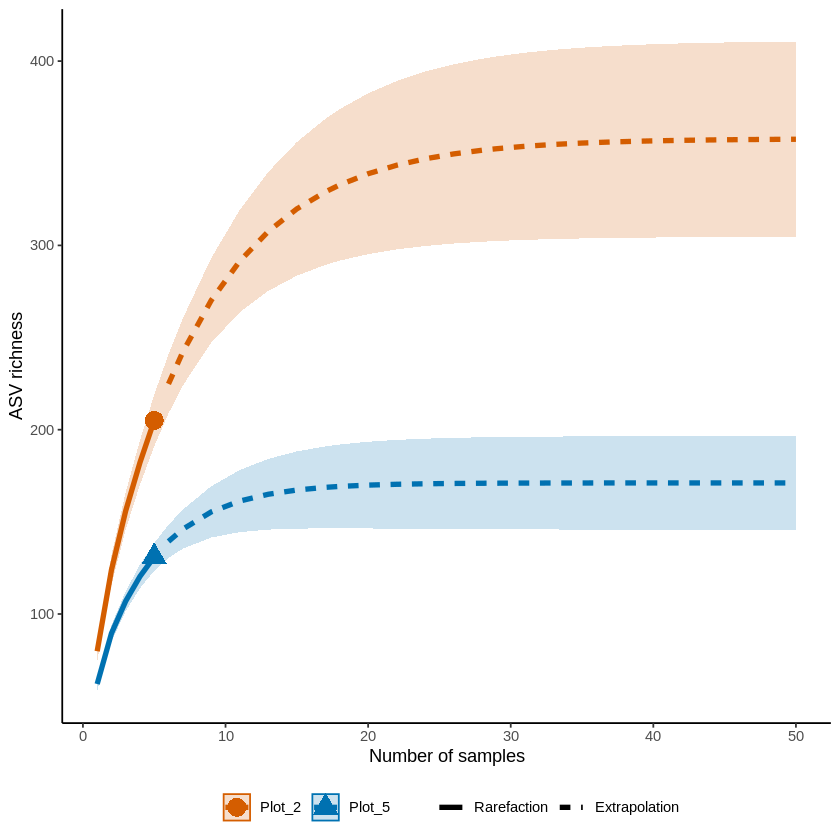

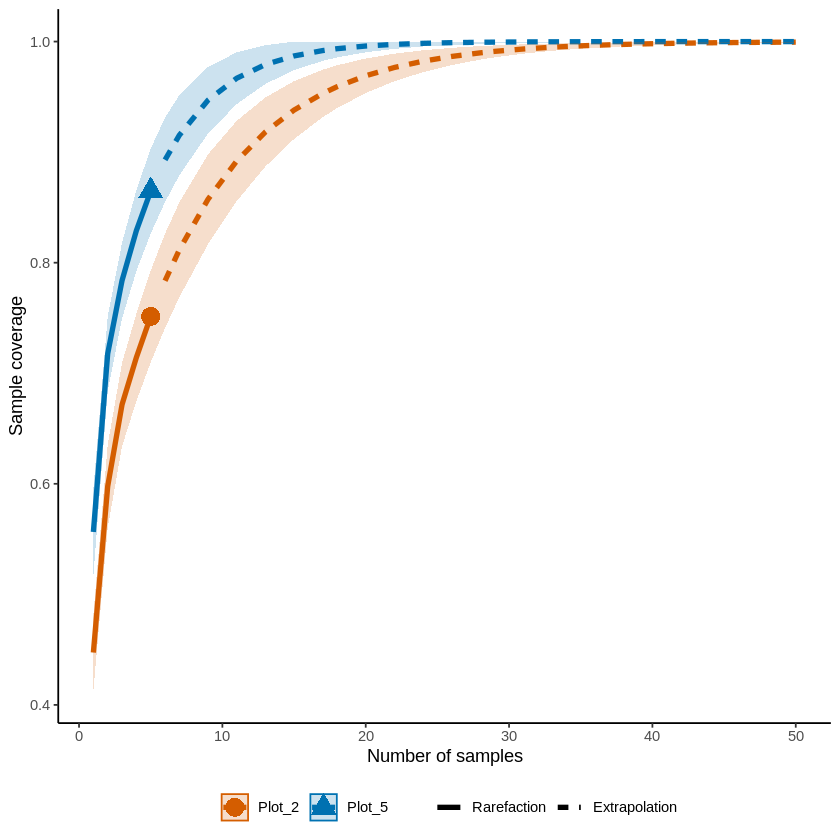

In [13]:
#Plot ASV richness and sample coverage estimates using ggiNEXT

ggiNEXT(out, type=1) + xlab("Number of samples") + ylab("ASV richness") + theme_classic() + theme(legend.position="bottom")
ggiNEXT(out, type=2) + xlab("Number of samples") + theme_classic() + theme(legend.position="bottom")

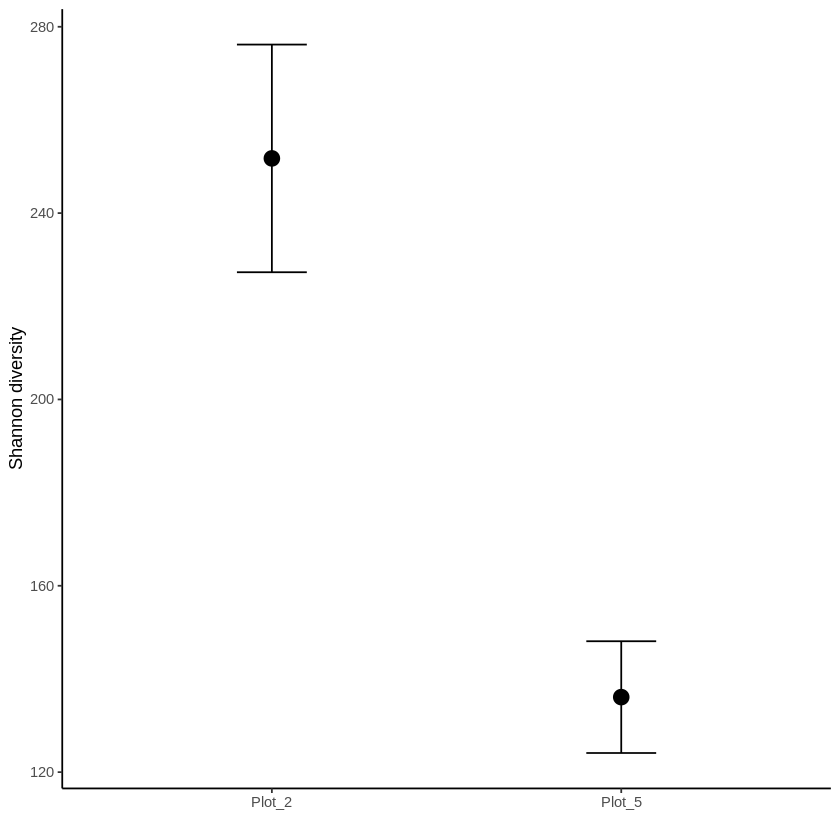

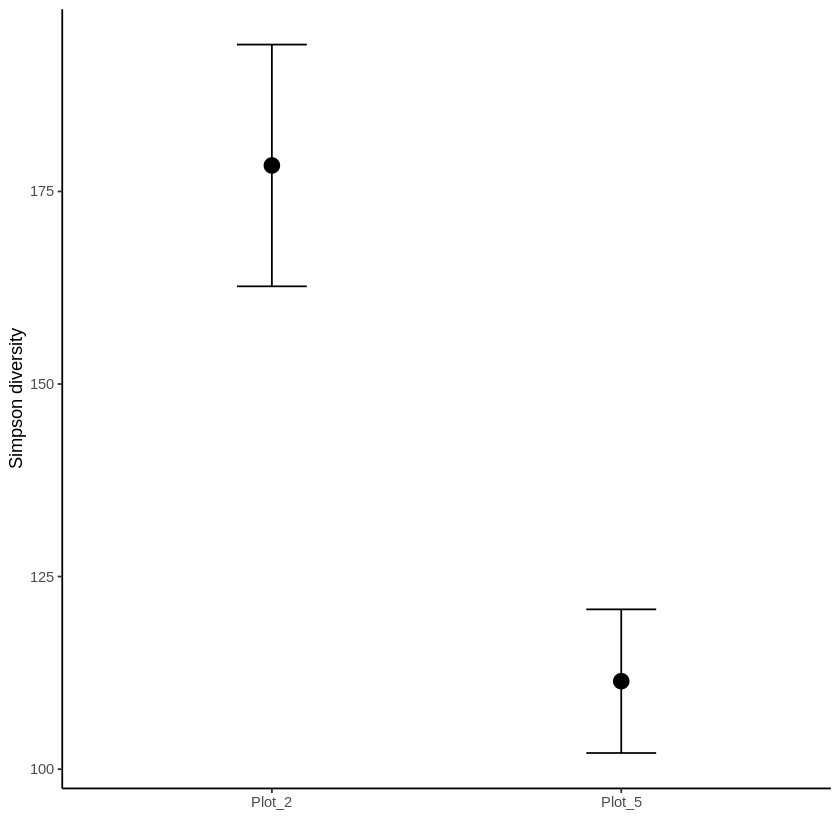

In [22]:
#Plot diversity estimates using ggplot
shannon <- out$AsyEst[out$AsyEst$Diversity=="Shannon diversity",]
ggplot(shannon, aes(x=Assemblage, y=Estimator)) + geom_point(size = 4) + geom_errorbar(aes(ymax = UCL, ymin = LCL), width = 0.2) + xlab("") + ylab("Shannon diversity") + scale_x_discrete(labels = c("Plot_2", "Plot_5")) + theme_classic()
simpson <- out$AsyEst[out$AsyEst$Diversity=="Simpson diversity",]
ggplot(simpson, aes(x=Assemblage, y=Estimator)) + geom_point(size = 4) + geom_errorbar(aes(ymax = UCL, ymin = LCL), width = 0.2) + xlab("") + ylab("Simpson diversity") + scale_x_discrete(labels = c("Plot_2", "Plot_5")) + theme_classic()

Warning message in heatmap.2(ASVnum_rel_matr, Rowv = FALSE, Colv = FALSE, scale = "row", :
“Discrepancy: Rowv is FALSE, while dendrogram is `both'. Omitting row dendogram.”
Warning message in heatmap.2(ASVnum_rel_matr, Rowv = FALSE, Colv = FALSE, scale = "row", :
“Discrepancy: Colv is FALSE, while dendrogram is `column'. Omitting column dendogram.”


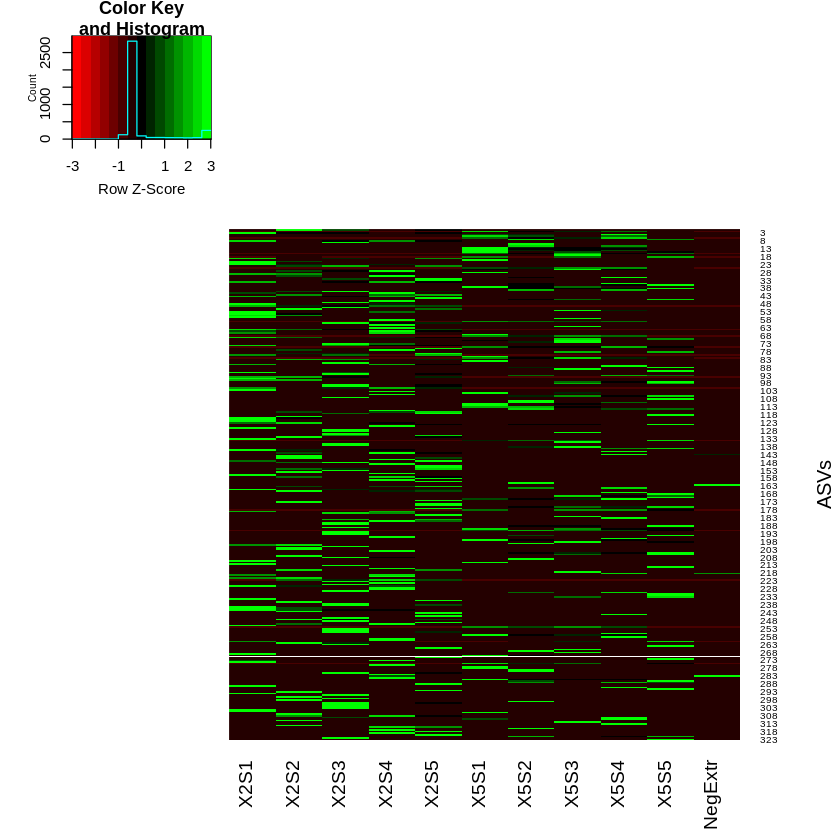

In [80]:
ASVnum_rel <- sapply(ASVnum, function(x) x*100/sum(x))
ASVnum_rel_matr <- as.matrix(ASVnum_rel[,])
heatmap.2(ASVnum_rel_matr,Rowv=FALSE, Colv=FALSE, scale="row", trace="none", col=redgreen, ylab="ASVs", margins=c(5,5))